`RxnTools` is a custom package under active development for the purpose of 1) extracting stereochemistry-aware reaction templates from fully atom-mapped reactions and 2) enumerating stereochemistry-aware reactions using these extracted templates. This notebook covers some basic functions for extracting mapped bonds and atoms within the `reaction` module. All atom-mapped reactions are taken from Esther Heid's publication of the EnzymeMap database (https://pubs.rsc.org/en/content/articlehtml/2023/sc/d3sc02048g).

In [1]:
from rxntools import reaction
from rdkit import Chem
from rdkit.Chem import AllChem

Consider the fully atom-mapped alcohol dehydrogenase reaction involving the oxidation of ethanol to ethanal:

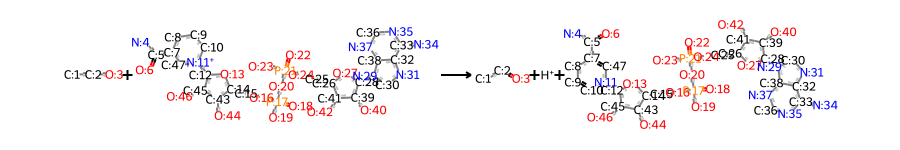

In [2]:
AllChem.ReactionFromSmarts('[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]1[cH:8][cH:9][cH:10][n+:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[cH:47]1>>[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[C:7]1=[CH:47][N:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[CH:10]=[CH:9][CH2:8]1')

We can instantiate an object of the `mapped_reaction` class with this fully-atom mapped SMARTS representation of the alcohol dehydrogenase reaction.

In [3]:
mapped_rxn = reaction.mapped_reaction(rxn_smarts = '[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]1[cH:8][cH:9][cH:10][n+:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[cH:47]1>>[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[C:7]1=[CH:47][N:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[CH:10]=[CH:9][CH2:8]1')

For the instantiate `mapped_rxn` object, the original reaction SMARTS can be accessed via the attribute `mapped_rxn.rxn_smarts`:

In [4]:
mapped_rxn.rxn_smarts

'[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]1[cH:8][cH:9][cH:10][n+:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[cH:47]1>>[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[C:7]1=[CH:47][N:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[CH:10]=[CH:9][CH2:8]1'

The first key method under the `mapped_reaction` class is the function `_get_mapped_bonds`. This takes an RDKit `Chem.rdchem.Mol` object corresponding to a sigle molecule as an input and returns the set of all mapped bonds within this molecule. Each element in this set is a tuple that corresponds to a mapped bond. This tuple inturn comprises three elements: 1) the starting atom index of a bond (an integer), 2) the ending atom index of a bond (an integer), and the bond type (single, double, aromatic, etc). This bond type is an `Chem.rdchem.BondType` data type.

In [5]:
atom_mapped_ethanol_SMARTS = '[CH3:1][CH2:2][OH:3]'
mol = Chem.MolFromSmarts(atom_mapped_ethanol_SMARTS)

mapped_rxn._get_mapped_bonds(mol)

{(1, 2, rdkit.Chem.rdchem.BondType.SINGLE),
 (2, 3, rdkit.Chem.rdchem.BondType.SINGLE)}

This is a static method so it can be accessed directly using the `mapped_reaction` class and outside of the instantiated `mapped_rxn` object' too

In [6]:
reaction.mapped_reaction._get_mapped_bonds(mol)

{(1, 2, rdkit.Chem.rdchem.BondType.SINGLE),
 (2, 3, rdkit.Chem.rdchem.BondType.SINGLE)}